In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
np.random.seed(seed=42)

from collections import Counter

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import os

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [11]:
pd.set_option('display.max_rows', 1000)
pd.options.display.max_columns = 1000


In [12]:
sat =pd.read_csv('train_sample.csv', delimiter = ',', header = 0)

C:\Users\shant\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
sat['fecha_dato'] = pd.to_datetime(sat['fecha_dato'])

In [14]:
sat['fecha_alta'] = pd.to_datetime(sat['fecha_alta'])

In [18]:
sat["age"]=pd.to_numeric(sat['age'], errors='coerce')

In [19]:
sat.rename(columns = {'ind_ahor_fin_ult1': 'Saving Account', 'ind_aval_fin_ult1':'Guarantees', 'ind_cco_fin_ult1':'Current Accounts',
       'ind_cder_fin_ult1':'Derivada Account', 'ind_cno_fin_ult1':'Payroll Account', 'ind_ctju_fin_ult1':'Junior Account',
       'ind_ctma_fin_ult1':'Más particular Account', 'ind_ctop_fin_ult1':'particular Account', 'ind_ctpp_fin_ult1':'particular Plus Account',
       'ind_deco_fin_ult1':'Short-term deposits', 'ind_deme_fin_ult1':'Medium-term deposits', 'ind_dela_fin_ult1':'Long-term deposits',
       'ind_ecue_fin_ult1':'e-account', 'ind_fond_fin_ult1':'Funds', 'ind_hip_fin_ult1':'Mortgage',
       'ind_plan_fin_ult1':'Pensions', 'ind_pres_fin_ult1':'Loans', 'ind_reca_fin_ult1':'Taxes',
       'ind_tjcr_fin_ult1':'Credit Card', 'ind_valo_fin_ult1':'Securities', 'ind_viv_fin_ult1':'Home Account',
       'ind_nomina_ult1':'Payroll', 'ind_nom_pens_ult1':'Pensions', 'ind_recibo_ult1':'Direct Debit'}, inplace = True)

In [15]:
sat.drop(['pais_residencia','sexo'], axis =1, inplace=True)
sat.drop('ind_nuevo', axis =1, inplace=True)
sat.drop(sat.iloc[:, 6:17], axis =1, inplace=True)

In [16]:
sat = sat.drop_duplicates(subset='ncodpers', keep='first')

In [58]:
# duplicateRowsDF = sat[sat.duplicated(['ncodpers'])]
# print("Duplicate Rows based on a single column are:", duplicateRowsDF, sep='\n')

Duplicate Rows based on a single column are:
       fecha_dato  ncodpers ind_empleado   age fecha_alta antiguedad  \
223    2015-07-28    676513            N  41.0 2007-02-11        101   
1583   2016-02-28    649419            N  36.0 2006-10-18        112   
3410   2016-04-28   1071467            N  23.0 2012-10-01         42   
3569   2015-09-28    699767            N  42.0 2007-06-27         99   
4110   2016-01-28    936335            N  25.0 2011-08-26         53   
...           ...       ...          ...   ...        ...        ...   
999991 2015-11-28   1293452            N  20.0 2014-08-06         15   
999992 2015-04-28   1277174            N  21.0 2014-07-24         12   
999993 2016-01-28     45641            N  51.0 1996-09-27        232   
999994 2016-03-28    459128            N  47.0 2004-02-12        145   
999995 2015-02-28    962214            N  25.0 2011-10-14         45   

        cod_prov      nomprov  ind_actividad_cliente      renta  \
223         33.0     AS

In [120]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616377 entries, 0 to 999999
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   fecha_dato               616377 non-null  datetime64[ns]
 1   ncodpers                 616377 non-null  int64         
 2   ind_empleado             614601 non-null  object        
 3   age                      614601 non-null  float64       
 4   fecha_alta               614601 non-null  datetime64[ns]
 5   antiguedad               616377 non-null  object        
 6   nomprov                  611745 non-null  object        
 7   ind_actividad_cliente    614601 non-null  float64       
 8   renta                    482945 non-null  float64       
 9   segmento                 605255 non-null  object        
 10  Saving Account           616377 non-null  int64         
 11  Guarantees               616377 non-null  int64         
 12  Current Accounts

In [21]:
sat['Total_Products_Used'] = sat.iloc[:, -24:].sum(axis=1) #ALL
sat['Investment_Products'] = sat.iloc[:, [13,23,25,29,32,]].sum(axis=1) #Derivatives,Funds,Pensions,Securities,Pensions
sat['Debt_Products'] = sat.iloc[:, [26,27,28,]].sum(axis=1) #Loans, Taxes, Credit Card
sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616377 entries, 0 to 999999
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   fecha_dato               616377 non-null  datetime64[ns]
 1   ncodpers                 616377 non-null  int64         
 2   ind_empleado             614601 non-null  object        
 3   age                      614601 non-null  float64       
 4   fecha_alta               614601 non-null  datetime64[ns]
 5   antiguedad               616377 non-null  object        
 6   nomprov                  611745 non-null  object        
 7   ind_actividad_cliente    614601 non-null  float64       
 8   renta                    482945 non-null  float64       
 9   segmento                 605255 non-null  object        
 10  Saving Account           616377 non-null  int64         
 11  Guarantees               616377 non-null  int64         
 12  Current Accounts

In [22]:
tpu=sat.groupby('ind_empleado')['Total_Products_Used'].value_counts().to_frame()
tpu

Total_Products_Used
ind_empleado Total_Products_Used                     
A            6.0                                   15
             8.0                                   13
             4.0                                   12
             10.0                                  11
             9.0                                    9
             3.0                                    8
             7.0                                    8
             5.0                                    7
             1.0                                    5
             2.0                                    5
             11.0                                   5
             0.0                                    3
             12.0                                   1
B            0.0                                   26
             1.0                                   25
             2.0                                   23
             4.0                                   18
             3.0                                   14
             5.0                                   14
             6.0                                   12
             9.0                                   10
             7.0                                    7
             8.0                                    6
             10.0                                   5
             11.0                                   1
             12.0                                   1
F            2.0                                   26
             4.0                                   18
             3.0                                   14
             5.0                                   13
             0.0                                    8
             1.0                                    8
             6.0                                    7
             8.0                                    6
             9.0                                    6
             7.0                                    3
             10.0                                   2
N            1.0                               314583
             0.0                               130698
             2.0                                83761
             3.0                                33130
             4.0                                19256
             5.0                                12342
             6.0                                 9011
             7.0                                 6027
             8.0                                 3279
             9.0                                 1407
             10.0                                 513
             11.0                                 168
             12.0                                  42
             13.0                                   8
             14.0                                   1

In [92]:
tpu.Total_Products_Used.median()

12.0

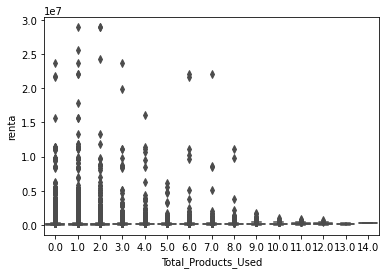

In [118]:
ax = sns.boxplot(x = 'Total_Products_Used', y = 'renta', data = sat, color = 'cyan')
# ax = sns.swarmplot(x = 'Total_Products_Used', y = 'ind_empleado', data = sat, color = 'red')

In [23]:
genpub = sat[sat['ind_empleado'] == 'N']
genpubMIL= genpub[genpub['renta'] < 1000000]

In [24]:
genpubMIL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481412 entries, 0 to 999999
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   fecha_dato               481412 non-null  datetime64[ns]
 1   ncodpers                 481412 non-null  int64         
 2   ind_empleado             481412 non-null  object        
 3   age                      481412 non-null  float64       
 4   fecha_alta               481412 non-null  datetime64[ns]
 5   antiguedad               481412 non-null  object        
 6   nomprov                  481401 non-null  object        
 7   ind_actividad_cliente    481412 non-null  float64       
 8   renta                    481412 non-null  float64       
 9   segmento                 478425 non-null  object        
 10  Saving Account           481412 non-null  int64         
 11  Guarantees               481412 non-null  int64         
 12  Current Accounts

In [25]:
genpubMILage= genpubMIL[(genpubMIL['age'] > 40) & (genpubMIL['age'] < 56)] 

In [26]:
genpubMILage.describe()

,ncodpers,age,ind_actividad_cliente,renta,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions,Direct Debit,Total_Products_Used,Investment_Products,Debt_Products
count,1.419610e+05,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.0,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141958.000000,141958.000000,141961.000000,141961.000000,141961.000000,141961.000000
mean,5.485155e+05,47.137453,0.574179,135166.782730,0.000352,0.000056,0.553511,0.000768,0.134861,0.0,0.012370,0.222653,0.083431,0.002642,0.003099,0.072041,0.135136,0.031741,0.016033,0.019991,0.004713,0.101049,0.090152,0.048739,0.009200,0.101988,0.104136,0.210389,1.959045,0.205373,0.195913
std,3.797147e+05,4.158166,0.494469,96216.396056,0.018764,0.007507,0.497130,0.027699,0.341576,0.0,0.110529,0.416028,0.276534,0.051328,0.055586,0.258557,0.341870,0.175311,0.125601,0.139971,0.068486,0.301394,0.286400,0.215322,0.095473,0.302633,0.305439,0.407586,1.996139,0.501866,0.472439
min,1.593000e+04,41.000000,0.000000,2336.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.257270e+05,44.000000,0.000000,74633.640000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.748440e+05,47.000000,1.000000,110413.050000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.102280e+05,51.000000,1.000000,164826.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
max,1.454583e+06,55.000000,1.000000,999927.090000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,5.000000,3.000000


In [138]:
employee = sat.loc[(sat['ind_empleado'] == 'A') | (sat['ind_empleado'] == 'B') | (sat['ind_empleado'] == 'F')]

In [139]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 777 to 996543
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   fecha_dato               375 non-null    datetime64[ns]
 1   ncodpers                 375 non-null    int64         
 2   ind_empleado             375 non-null    object        
 3   age                      375 non-null    float64       
 4   fecha_alta               375 non-null    datetime64[ns]
 5   antiguedad               375 non-null    object        
 6   nomprov                  373 non-null    object        
 7   ind_actividad_cliente    375 non-null    float64       
 8   renta                    343 non-null    float64       
 9   segmento                 374 non-null    object        
 10  Saving Account           375 non-null    int64         
 11  Guarantees               375 non-null    int64         
 12  Current Accounts         375 no

In [145]:
# copy_of_employee = employee.copy()
# # copy_of_employee.loc[:,'S_employee'] = 'employee'
# copy_of_employee.head()
employee = copy_of_employee

In [146]:
employeeage = employee[(employee['age'] > 40) & (employee['age'] < 56)] 

In [147]:
employeeage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 2042 to 996543
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   fecha_dato               315 non-null    datetime64[ns]
 1   ncodpers                 315 non-null    int64         
 2   ind_empleado             315 non-null    object        
 3   age                      315 non-null    float64       
 4   fecha_alta               315 non-null    datetime64[ns]
 5   antiguedad               315 non-null    object        
 6   nomprov                  313 non-null    object        
 7   ind_actividad_cliente    315 non-null    float64       
 8   renta                    290 non-null    float64       
 9   segmento                 314 non-null    object        
 10  Saving Account           315 non-null    int64         
 11  Guarantees               315 non-null    int64         
 12  Current Accounts         315 n

In [153]:
# genpubMILage.info()
# copy_of_gen = genpubMILage.copy()
# copy_of_gen.loc[:,'S_employee'] = 'public'
genpubMILage = copy_of_gen

In [154]:
genpubMILage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141961 entries, 0 to 999996
Data columns (total 38 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   fecha_dato               141961 non-null  datetime64[ns]
 1   ncodpers                 141961 non-null  int64         
 2   ind_empleado             141961 non-null  object        
 3   age                      141961 non-null  float64       
 4   fecha_alta               141961 non-null  datetime64[ns]
 5   antiguedad               141961 non-null  object        
 6   nomprov                  141957 non-null  object        
 7   ind_actividad_cliente    141961 non-null  float64       
 8   renta                    141961 non-null  float64       
 9   segmento                 141446 non-null  object        
 10  Saving Account           141961 non-null  int64         
 11  Guarantees               141961 non-null  int64         
 12  Current Accounts

In [148]:
employeeage.describe()

,ncodpers,age,ind_actividad_cliente,renta,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions,Direct Debit,Total_Products_Used,Investment_Products,Debt_Products
count,315.000000,315.000000,315.000000,290.000000,315.0,315.000000,315.000000,315.000000,315.000000,315.0,315.0,315.000000,315.000000,315.0,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,97102.092063,46.777778,0.822222,175042.717448,0.0,0.006349,0.638095,0.012698,0.311111,0.0,0.0,0.326984,0.231746,0.0,0.003175,0.146032,0.361905,0.114286,0.098413,0.200000,0.025397,0.212698,0.390476,0.295238,0.031746,0.257143,0.257143,0.558730,4.479365,0.879365,0.628571
std,124930.286765,3.691290,0.382934,103421.957618,0.0,0.079555,0.481316,0.112148,0.463685,0.0,0.0,0.469858,0.422619,0.0,0.056344,0.353700,0.481316,0.318664,0.298346,0.400636,0.157577,0.409867,0.488633,0.456875,0.175602,0.437754,0.437754,0.497329,3.061272,1.033539,0.734810
min,15895.000000,41.000000,0.000000,36015.600000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18362.500000,44.000000,1.000000,112632.465000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,65833.000000,46.000000,1.000000,155669.160000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000
75%,120467.500000,49.000000,1.000000,205826.280000,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,7.000000,2.000000,1.000000
max,904078.000000,55.000000,1.000000,894900.180000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,4.000000,3.000000


In [ ]:
# low_genpubMIL = genpubMIL[(genpubMIL['renta'] < 101732.5)]

In [32]:
genpubMILage.describe()

,ncodpers,age,ind_actividad_cliente,renta,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions,Direct Debit,Total_Products_Used,Investment_Products,Debt_Products
count,1.419610e+05,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.0,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141961.000000,141958.000000,141958.000000,141961.000000,141961.000000,141961.000000,141961.000000
mean,5.485155e+05,47.137453,0.574179,135166.782730,0.000352,0.000056,0.553511,0.000768,0.134861,0.0,0.012370,0.222653,0.083431,0.002642,0.003099,0.072041,0.135136,0.031741,0.016033,0.019991,0.004713,0.101049,0.090152,0.048739,0.009200,0.101988,0.104136,0.210389,1.959045,0.205373,0.195913
std,3.797147e+05,4.158166,0.494469,96216.396056,0.018764,0.007507,0.497130,0.027699,0.341576,0.0,0.110529,0.416028,0.276534,0.051328,0.055586,0.258557,0.341870,0.175311,0.125601,0.139971,0.068486,0.301394,0.286400,0.215322,0.095473,0.302633,0.305439,0.407586,1.996139,0.501866,0.472439
min,1.593000e+04,41.000000,0.000000,2336.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.257270e+05,44.000000,0.000000,74633.640000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.748440e+05,47.000000,1.000000,110413.050000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.102280e+05,51.000000,1.000000,164826.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
max,1.454583e+06,55.000000,1.000000,999927.090000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,5.000000,3.000000


In [155]:
FINAL= employeeage.append(genpubMILage, ignore_index=False)

In [254]:
FINAL = FINAL[FINAL['Total_Products_Used'] > 0]

In [255]:
FINAL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110950 entries, 2042 to 999996
Data columns (total 38 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   fecha_dato               110950 non-null  datetime64[ns]
 1   ncodpers                 110950 non-null  int64         
 2   ind_empleado             110950 non-null  object        
 3   age                      110950 non-null  float64       
 4   fecha_alta               110950 non-null  datetime64[ns]
 5   antiguedad               110950 non-null  object        
 6   nomprov                  110944 non-null  object        
 7   ind_actividad_cliente    110950 non-null  float64       
 8   renta                    110929 non-null  float64       
 9   segmento                 110852 non-null  object        
 10  Saving Account           110950 non-null  int64         
 11  Guarantees               110950 non-null  int64         
 12  Current Accou

In [257]:
FINAL.describe()

,ncodpers,age,ind_actividad_cliente,renta,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions,Direct Debit,Total_Products_Used,Investment_Products,Debt_Products
count,1.109500e+05,110950.000000,110950.000000,110929.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.0,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110948.000000,110948.000000,110950.000000,110950.000000,110950.000000,110950.000000
mean,5.387429e+05,47.139784,0.734304,137064.089284,0.000451,0.000090,0.710032,0.001018,0.173438,0.0,0.015827,0.285813,0.107409,0.003380,0.003975,0.092591,0.173934,0.040937,0.020793,0.026147,0.006102,0.129896,0.116458,0.063200,0.011861,0.131224,0.133973,0.270780,2.519324,0.265273,0.252456
std,3.798814e+05,4.149481,0.441705,95670.659660,0.021224,0.009493,0.453749,0.031897,0.378628,0.0,0.124806,0.451803,0.309634,0.058039,0.062921,0.289860,0.379055,0.198146,0.142692,0.159573,0.077876,0.336191,0.320775,0.243323,0.108262,0.337646,0.340624,0.444364,1.935284,0.557749,0.523077
min,1.589500e+04,41.000000,0.000000,3796.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.187245e+05,44.000000,0.000000,76470.510000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.589095e+05,47.000000,1.000000,112962.390000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,8.002048e+05,50.000000,1.000000,167657.130000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
max,1.454583e+06,55.000000,1.000000,999927.090000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,5.000000,3.000000


In [258]:
FINAL.describe()

,ncodpers,age,ind_actividad_cliente,renta,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions,Direct Debit,Total_Products_Used,Investment_Products,Debt_Products
count,1.109500e+05,110950.000000,110950.000000,110929.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.0,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110950.000000,110948.000000,110948.000000,110950.000000,110950.000000,110950.000000,110950.000000
mean,5.387429e+05,47.139784,0.734304,137064.089284,0.000451,0.000090,0.710032,0.001018,0.173438,0.0,0.015827,0.285813,0.107409,0.003380,0.003975,0.092591,0.173934,0.040937,0.020793,0.026147,0.006102,0.129896,0.116458,0.063200,0.011861,0.131224,0.133973,0.270780,2.519324,0.265273,0.252456
std,3.798814e+05,4.149481,0.441705,95670.659660,0.021224,0.009493,0.453749,0.031897,0.378628,0.0,0.124806,0.451803,0.309634,0.058039,0.062921,0.289860,0.379055,0.198146,0.142692,0.159573,0.077876,0.336191,0.320775,0.243323,0.108262,0.337646,0.340624,0.444364,1.935284,0.557749,0.523077
min,1.589500e+04,41.000000,0.000000,3796.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.187245e+05,44.000000,0.000000,76470.510000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.589095e+05,47.000000,1.000000,112962.390000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,8.002048e+05,50.000000,1.000000,167657.130000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
max,1.454583e+06,55.000000,1.000000,999927.090000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,5.000000,3.000000


In [260]:
FINAL.S_employee.value_counts()

public      110663
employee       287
Name: S_employee, dtype: int64

In [267]:
FINAL[FINAL['S_employee']== 'employee'].median()

ncodpers                    65831.000
age                            47.000
antiguedad                    216.000
ind_actividad_cliente           1.000
renta                      155220.195
Saving Account                  0.000
Guarantees                      0.000
Current Accounts                1.000
Derivada Account                0.000
Payroll Account                 0.000
Junior Account                  0.000
Más particular Account          0.000
particular Account              0.000
particular Plus Account         0.000
Short-term deposits             0.000
Medium-term deposits            0.000
Long-term deposits              0.000
e-account                       0.000
Funds                           0.000
Mortgage                        0.000
Pensions                        0.000
Loans                           0.000
Taxes                           0.000
Credit Card                     0.000
Securities                      0.000
Home Account                    0.000
Payroll     

In [269]:
FINAL[FINAL['S_employee']== 'public'].median()

ncodpers                   460011.00
age                            47.00
antiguedad                    134.00
ind_actividad_cliente           1.00
renta                      112865.82
Saving Account                  0.00
Guarantees                      0.00
Current Accounts                1.00
Derivada Account                0.00
Payroll Account                 0.00
Junior Account                  0.00
Más particular Account          0.00
particular Account              0.00
particular Plus Account         0.00
Short-term deposits             0.00
Medium-term deposits            0.00
Long-term deposits              0.00
e-account                       0.00
Funds                           0.00
Mortgage                        0.00
Pensions                        0.00
Loans                           0.00
Taxes                           0.00
Credit Card                     0.00
Securities                      0.00
Home Account                    0.00
Payroll                         0.00
P

In [186]:
employeeage.to_csv('employee.csv',header=True)

In [187]:
genpubMILage.to_csv('genpub.csv',header=True)

In [191]:
FINAL.to_csv('SATFINALL.csv',header=True)

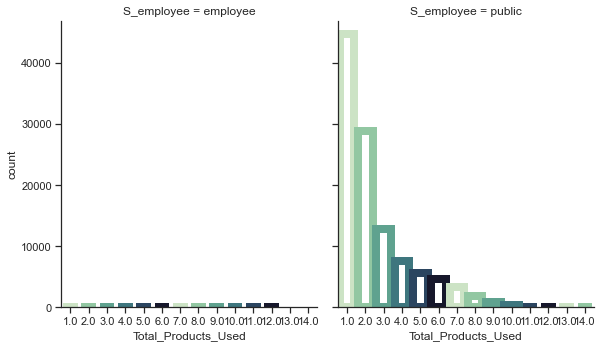

In [226]:
g = sns.catplot('Total_Products_Used', col='S_employee', col_wrap=4, data=FINAL[#(FINAL['renta']> 175000) & 
    (FINAL['Total_Products_Used']>0)],kind="count", height=5, aspect=.8, 
                facecolor=(0, 0, 0, 0),
                   linewidth=8,
                   edgecolor=sns.color_palette("ch:55530555.1,-.5,dark=.1"))

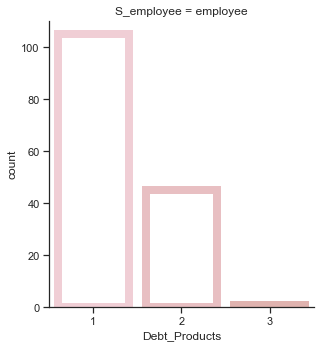

In [252]:
g = sns.catplot('Debt_Products', col='S_employee', col_wrap=4, data=employeeage[#(FINAL['renta']> 175000) & 
    (employeeage['Debt_Products']>0)],kind="count", height=5, aspect=.8, 
                facecolor=(0, 0, 0, 0),
                   linewidth=8,
                   edgecolor=sns.color_palette("ch:2.1,-.5,dark=.6"))

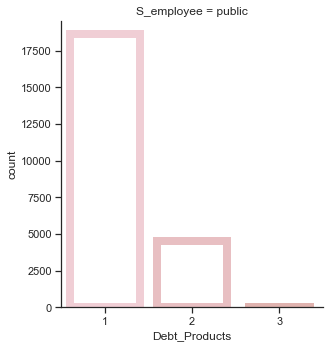

In [253]:
g = sns.catplot('Debt_Products', col='S_employee', col_wrap=4, data=genpubMILage[#(FINAL['renta']> 175000) & 
    (genpubMILage['Debt_Products']>0)],kind="count", height=5, aspect=.8, 
                facecolor=(0, 0, 0, 0),
                   linewidth=8,
                   edgecolor=sns.color_palette("ch:2.1,-.5,dark=.6"))

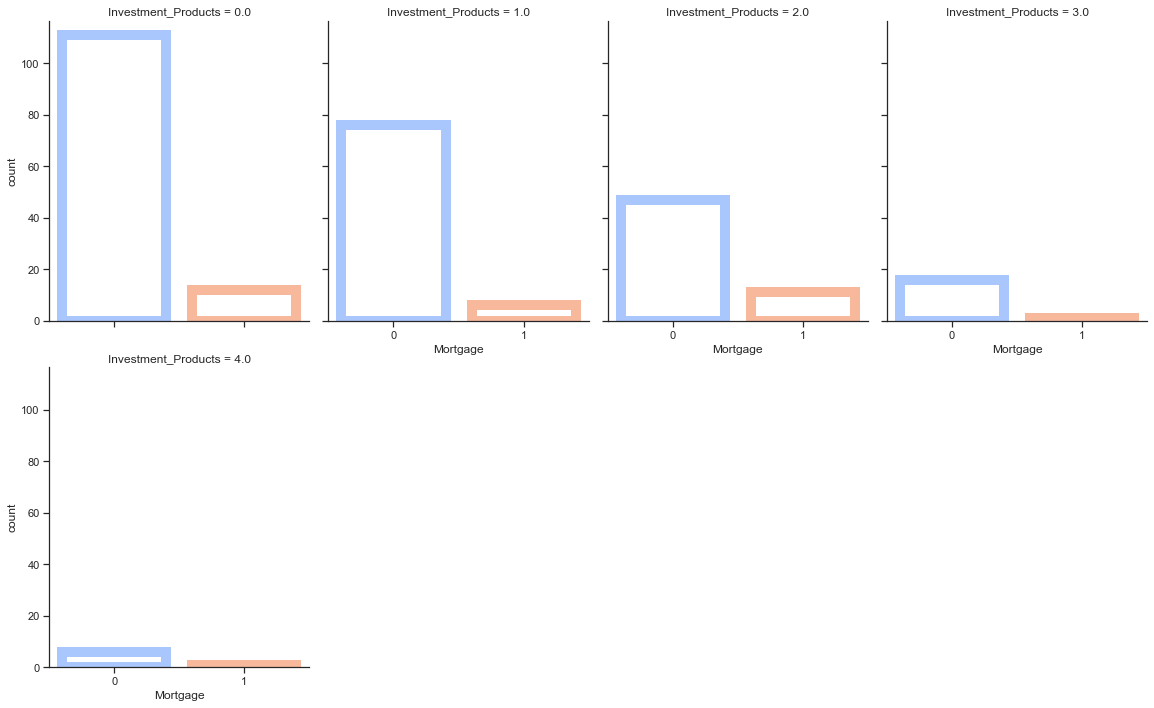

In [299]:

g = sns.catplot('Mortgage', col='Investment_Products', col_wrap=4, data=FINAL[(FINAL['S_employee'] == 'employee')],kind="count", height=5, aspect=.8, 
                facecolor=(0, 0, 0, 0),
                   linewidth=10,
                   edgecolor=sns.color_palette("coolwarm", 2))

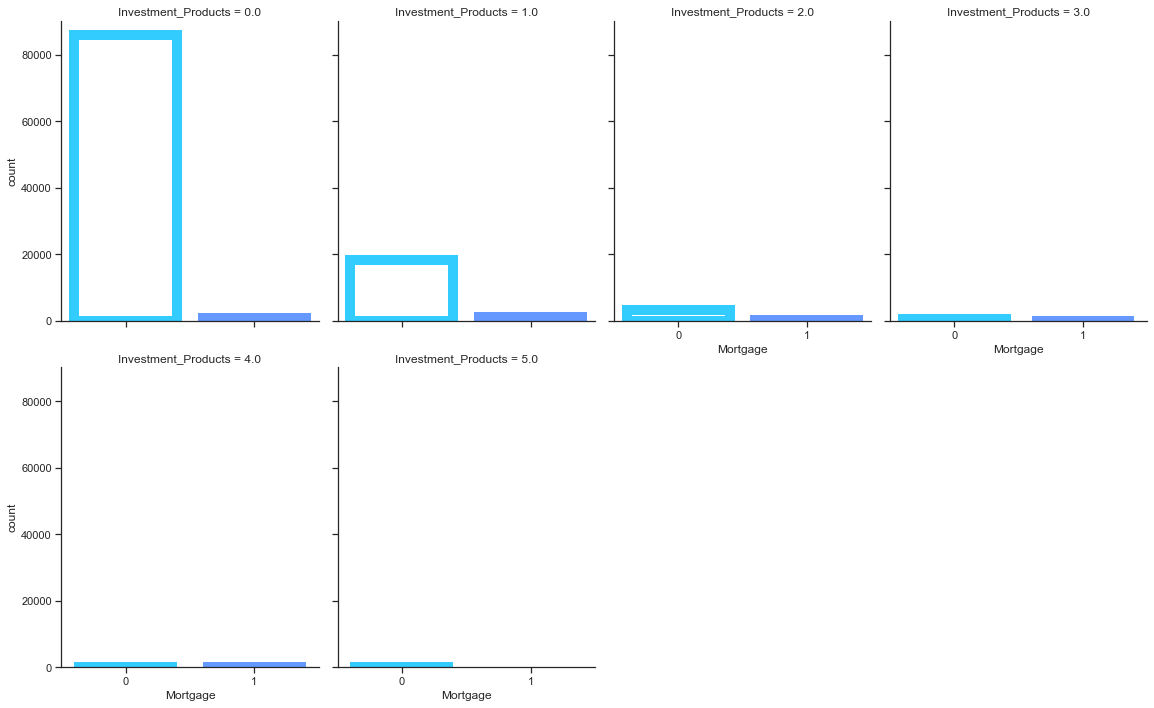

In [301]:

g = sns.catplot('Mortgage', col='Investment_Products', col_wrap=4, data=FINAL[(FINAL['S_employee'] == 'public')],kind="count", height=5, aspect=.8, 
                facecolor=(0, 0, 0, 0),
                   linewidth=10,
                   edgecolor=sns.color_palette("cool", 4))

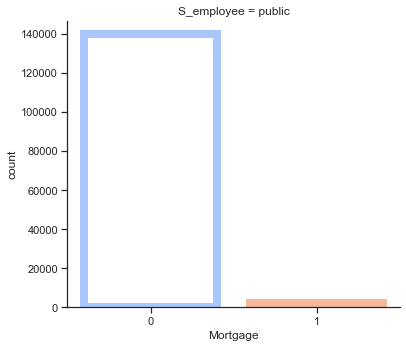

In [284]:
g = sns.catplot('Mortgage', col='S_employee', col_wrap=4, data=genpubMILage[genpubMILage.ind_empleado.notnull()],kind="count", height=5, aspect=1, 
                facecolor=(0, 0, 0, 0),
                   linewidth=8,
                   edgecolor=sns.color_palette("coolwarm", 2))


In [276]:
g = sns.catplot('Investment_Products', col='ind_empleado', col_wrap=4, data=employeeage[employeeage(['Investment_Products']>0)]),kind="count",  height=5, aspect=.8, facecolor=(0, 0, 0, 0),
linewidth=10,
                   edgecolor=sns.color_palette("coolwarm", 2)) 

IndentationError: unexpected indent (<ipython-input-276-a288b812837f>, line 2)

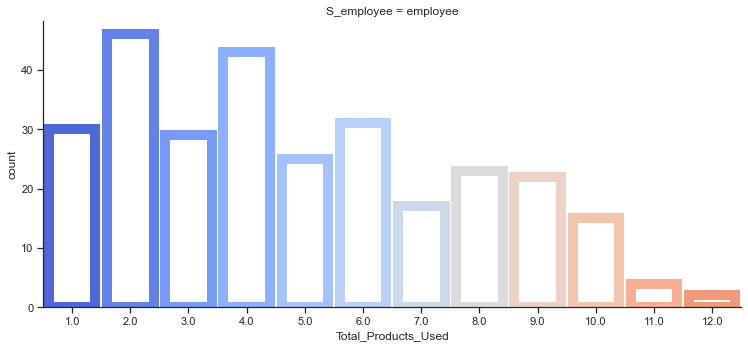

In [307]:
g = sns.catplot('Total_Products_Used', col='S_employee', col_wrap=4, data=employeeage[#(employeeage['renta']> 175000) & 
                (employeeage['Total_Products_Used']>0)], 
                kind="count",  
                height=5, 
                aspect=2, 
                facecolor=(0,0,0,0),
                   linewidth=10,
                   edgecolor=sns.color_palette("coolwarm", 15)) 

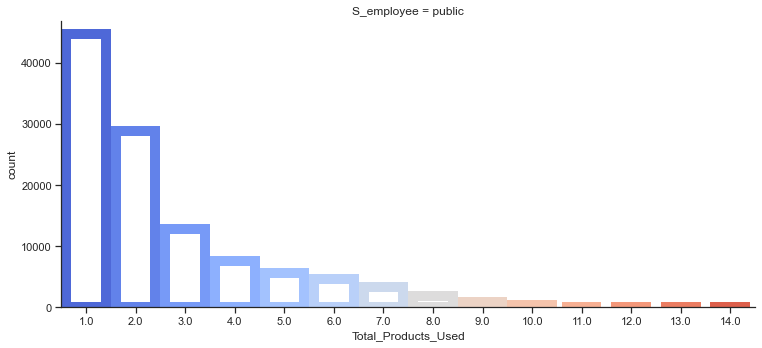

In [308]:
g = sns.catplot('Total_Products_Used', col='S_employee', col_wrap=4, data=genpubMILage[#(genpubMILage['renta']> 135000) & 
    (genpubMILage['Total_Products_Used']>0)], kind="count",  height=5, aspect=2, 
                facecolor=(0, 0, 0, 0),
                   linewidth=10,
                   edgecolor=sns.color_palette("coolwarm", 15)) 

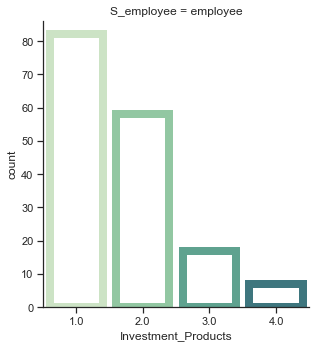

In [277]:
g = sns.catplot('Investment_Products', col='S_employee', col_wrap=4, data=employeeage[#(FINAL['renta']> 175000) & 
    (employeeage['Investment_Products']>0)],kind="count", height=5, aspect=.8, 
                facecolor=(0, 0, 0, 0),
                   linewidth=8,
                   edgecolor=sns.color_palette("ch:55530555.1,-.5,dark=.1"))

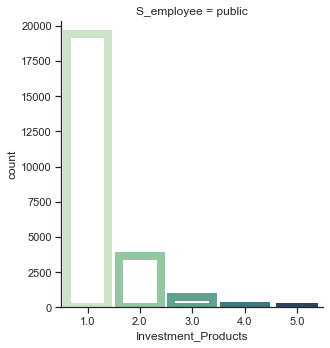

In [278]:
g = sns.catplot('Investment_Products', col='S_employee', col_wrap=4, data=genpubMILage[#(genpubMILage['renta']> 175000) & 
    (genpubMILage['Investment_Products']>0)],kind="count", height=5, aspect=.8, 
                facecolor=(0, 0, 0, 0),
                   linewidth=8,
                   edgecolor=sns.color_palette("ch:55530555.1,-.5,dark=.1"))

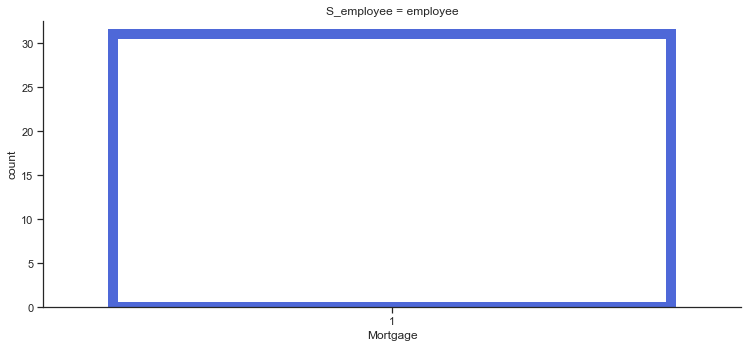

In [281]:
g = sns.catplot('Mortgage', col='S_employee', col_wrap=4, data=employeeage[#(employeeage['renta']> 175000) &], 
                kind="count",  
                height=5, 
                aspect=2, 
                facecolor=(0,0,0,0),
                   linewidth=10,
                   edgecolor=sns.color_palette("coolwarm", 15)) 

In [304]:
publicT = FINAL['S_employee'] == 'public'
employeeT = FINAL['S_employee'] == 'employee'
# stats.ttest_ind(FINAL['public']['Total_Products_Used'], FINAL['employeeT']['Total_Products_Used'], equal_var=False)

In [306]:
stats.ttest_ind(FINAL[publicT]['Total_Products_Used'], FINAL[employeeT]['Total_Products_Used'], equal_var=False)

Ttest_indResult(statistic=-14.268054448045348, pvalue=2.881349266270733e-35)

In [ ]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)